In [1]:
import cv2
import os
from tqdm import tqdm
import tensorflow as tf
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [233]:
TRAIN_DIR=r'C:\Users\shash\Downloads\Safe Waters\MINE\10k'
#TEST_DIR=r'D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\mine\Test'

In [234]:
IMG_SIZE=50
LR=0.001

In [235]:
#file1 = open(r"C:\Users\shash\Downloads\Safe Waters\MINE\Labels\grab500.txt","r+")
#s=file1.readlines()
#print(s[0])

In [236]:
import json
file=open(r"C:\Users\shash\Downloads\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\10k\_annotations.json")
data=json.load(file)

In [237]:
def label_img(img):
    label=data['annotations'][img][0]['label']
    if (label=='knee deep'):
        return(0)
    elif (label=='waist deep'):
        return(1)
    elif (label=='feet-dont-touch deep'):
        return(2)
    elif (label=='dangerously deep'):
        return(3)
    else:
        return(0)

In [238]:
def create_train_data():
    training_data=[]
    k=0
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img)
        path=os.path.join(TRAIN_DIR, img)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),[label]])
    shuffle(training_data)
    return training_data

In [239]:
train_data=create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 717.19it/s]


In [240]:
train_data

[[array([[ 21,  32,  36, ...,  49,  68,  54],
         [ 37,  32,  33, ..., 116,  63,  29],
         [ 29,  28,  28, ...,  43,  44,  59],
         ...,
         [ 62,  63,  71, ...,  46,  46,  46],
         [ 64,  65,  72, ...,  46,  46,  46],
         [ 64,  68,  69, ...,  46,  46,  46]], dtype=uint8),
  [1]],
 [array([[61, 59, 62, ..., 58, 54, 66],
         [61, 59, 58, ..., 50, 74, 53],
         [61, 59, 48, ..., 51, 34, 52],
         ...,
         [47, 47, 48, ..., 51, 52, 52],
         [47, 47, 50, ..., 51, 52, 52],
         [49, 49, 50, ..., 51, 52, 52]], dtype=uint8),
  [0]],
 [array([[63, 50, 30, ..., 54, 43, 28],
         [48, 58, 12, ..., 54, 42, 33],
         [55, 46,  5, ..., 52, 29, 26],
         ...,
         [49, 49, 49, ..., 53, 53, 51],
         [49, 49, 48, ..., 54, 54, 52],
         [49, 49, 48, ..., 53, 54, 52]], dtype=uint8),
  [2]],
 [array([[42, 43, 56, ..., 37, 36, 51],
         [81, 78, 74, ..., 62, 40, 47],
         [91, 82, 66, ..., 54, 42, 54],
         ...,

In [241]:
len(train_data)

10000

In [242]:
x=np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)/255.0
y=np.array([i[1] for i in train_data]).flatten()

In [243]:
print(x.shape,y.shape)

(10000, 50, 50, 1) (10000,)


In [244]:
x_train=x[:-2000]
y_train=y[:-2000]

x_test=x[-2000:]
y_test=y[-2000:]

In [245]:
x_train

array([[[[0.08235294],
         [0.1254902 ],
         [0.14117647],
         ...,
         [0.19215686],
         [0.26666667],
         [0.21176471]],

        [[0.14509804],
         [0.1254902 ],
         [0.12941176],
         ...,
         [0.45490196],
         [0.24705882],
         [0.11372549]],

        [[0.11372549],
         [0.10980392],
         [0.10980392],
         ...,
         [0.16862745],
         [0.17254902],
         [0.23137255]],

        ...,

        [[0.24313725],
         [0.24705882],
         [0.27843137],
         ...,
         [0.18039216],
         [0.18039216],
         [0.18039216]],

        [[0.25098039],
         [0.25490196],
         [0.28235294],
         ...,
         [0.18039216],
         [0.18039216],
         [0.18039216]],

        [[0.25098039],
         [0.26666667],
         [0.27058824],
         ...,
         [0.18039216],
         [0.18039216],
         [0.18039216]]],


       [[[0.23921569],
         [0.23137255],
         [0.24

In [246]:
set(y_test)

{0, 1, 2, 3}

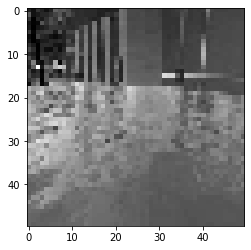

In [247]:
plt.imshow(x_train[5].reshape(IMG_SIZE,IMG_SIZE),cmap='gray')

In [248]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8000, 50, 50, 1) (8000,) (2000, 50, 50, 1) (2000,)


In [249]:
print(x_train[0].shape)

(50, 50, 1)


In [250]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(4, activation='softmax')(x)

model=Model(i,x)

In [251]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [252]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [253]:
r=model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=50)

  ...
    to  
  ['...']
Train for 250 steps, validate on 2000 samples
Epoch 1/50
250/250 [==============================] - 6s 24ms/step - loss: 1.4660 - accuracy: 0.3889 - val_loss: 3.7106 - val_accuracy: 0.3025
Epoch 2/50
250/250 [==============================] - 4s 17ms/step - loss: 1.1358 - accuracy: 0.4700 - val_loss: 3.1086 - val_accuracy: 0.3040
Epoch 3/50
250/250 [==============================] - 4s 17ms/step - loss: 1.0537 - accuracy: 0.5279 - val_loss: 1.1166 - val_accuracy: 0.4930
Epoch 4/50
250/250 [==============================] - 4s 17ms/step - loss: 1.0029 - accuracy: 0.5564 - val_loss: 1.0153 - val_accuracy: 0.5370
Epoch 5/50
250/250 [==============================] - 4s 17ms/step - loss: 0.9764 - accuracy: 0.5705 - val_loss: 1.2791 - val_accuracy: 0.42950.9768 - accuracy: 0.57
Epoch 6/50
250/250 [==============================] - 4s 17ms/step - loss: 0.9722 - accuracy: 0.5751 - val_loss: 1.4319 - val_accuracy: 0.4225
Epoch 7/50
250/250 [============================

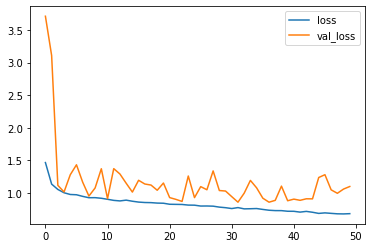

In [254]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [255]:
model.evaluate(x_train,y_train)

8000/8000 [==============================] - 2s 225us/sample - loss: 0.8365 - accuracy: 0.6365


[0.8365302624702453, 0.6365]

In [256]:
model.evaluate(x_test,y_test)

2000/2000 [==============================] - 0s 184us/sample - loss: 1.0989 - accuracy: 0.5500


[1.0989210920333863, 0.55]

In [257]:
model.save("model_10k_50")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_10k_50\assets


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = a
predicted = p
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted) )
print('Report : ')
print(classification_report(actual, predicted) )